<a href="https://colab.research.google.com/github/mapsguy/programming-gemini/blob/main/generating_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google-genai google-cloud-aiplatform Pillow

In [2]:
#import the genai library
from google import genai

In [3]:
#step 2: AIStudio: read the api key from the user data
from google.colab import userdata
client = genai.Client(api_key=userdata.get("GEMINI_API_KEY"))

#If you want to read from environment keys
#import os
#client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])

In [4]:
from google import genai
from google.genai import types
from PIL import Image
import io
from io import BytesIO
import base64

In [5]:
prompt = "A friendly robot waving hello, with a speech bubble saying 'Greetings!'"

gen_config = types.GenerateContentConfig(
    response_modalities=['TEXT', 'IMAGE']
)

response = client.models.generate_content(
    model='gemini-2.0-flash-exp-image-generation',
    contents=prompt,
    config=gen_config
)

print(response)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(part.text)
  elif part.inline_data is not None:
    image = Image.open(BytesIO((part.inline_data.data)))
    image.save('gemini-image.png')
    print("Image generated and saved.")

candidates=[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text='I will generate an image of a cheerful, metallic robot with round eyes and a wide, friendly smile, raising one of its articulated arms in a wave. A clearly visible speech bubble will float above its head, containing the text "Greetings!" in a cartoonish font.\n\n'), Part(video_metadata=None, thought=None, inline_data=Blob(display_name=None, data=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x02\x00\x00\x00\xf0\x7f\xbc\xd4\x00\x00\x00\x89zTXtRaw profile type iptc\x00\x00\x08\x99M\x8c1\x0e\x021\x0c\x04\xfb\xbc\xe2\x9e\x908\xeb\xb5]S\xd1Q\xf0\x81\xbb\\"!!\x81\xf8\x7fA\xa0\xe0\x98iV[L:_\xae\xa7\xe5\xf9z\x8c\xdb\xbd\xa7\xe5\x0b\x91\xaaC\x10\xd83\xa6?\x8a\x97\x96\x85}\xae\x8a\x9d\x85\xa0J6c\x18\xe8\x92a\x1cSc\xfb\xfc(\x88\xa3

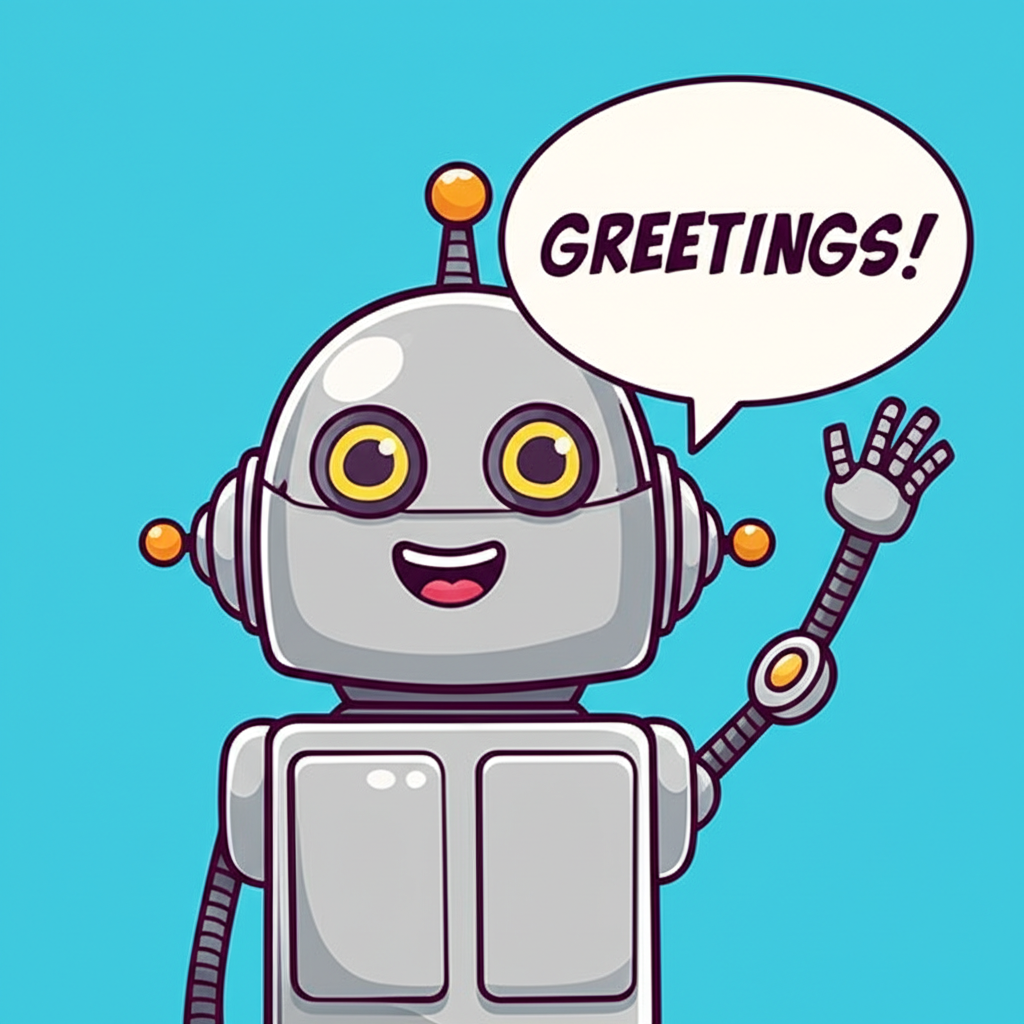

In [6]:
#Show the image
from IPython.display import Image
Image(filename='gemini-image.png')

In [16]:
#REST API example for image generation

%%bash

curl -s -X POST \
  "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash-exp-image-generation:generateContent?key=$GEMINI_API_KEY" \
  -H "Content-Type: application/json" \
  -d '{
    "contents": [{
      "parts": [
        {"text": "Create a friendly robot waving hello, with a speech bubble saying 'Greetings!'"}
      ]
    }],
    "generationConfig":{"responseModalities":["TEXT","IMAGE"]}
  }' \
  | grep -o '"data": "[^"]*"' \
  | cut -d'"' -f4 \
  | base64 --decode > gemini-image.png

In [ ]:
#I can't run this lol

#High quality image generation with Imagen 3

from google.genai import types

#fine-grained control over image generation

model_name = "imagen-3.0-generate-002" # Or other available Imagen 3 model

gen_config = types.GenerateImagesConfig(
    aspect_ratio="1:1",
    number_of_images=1,
    negative_prompts="Blurry, Cartoon",
    seed=42,
    person_generation="false" # Set to "true" to allow generating people.
)

response = client.models.generate_images(
    model=model_name,
    config=gen_config,
    prompt="A photorealistic image of a red panda playing a tiny piano in a lush forest.",

)

for generated_image in response.generated_images:
  image = Image.open(BytesIO(generated_image.image.image_bytes))
  image.save('imagen-image.png')


In [ ]:
#if response contains base64 encoded string
image_b64 = response.predictions[0]['bytesBase64Encoded']
image_bytes = base64.b64decode(image_b64)
img = Image.open(io.BytesIO(image_bytes))
img.show() # or img.save("imagen_3_output.png")
